**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



**Check: region directory**

In [2]:
txt_fdiry = file.path(FD_RES, "region_coverage_fcc_score")

vec = dir(txt_fdiry)
for (txt in vec){cat(txt, "\n")}

atac_ENCFF333TAT 
atac_ENCFF558BLC 
atac_ENCFF925CYR 
atac_ENCFF948AFM 
dnase_ENCFF185XRG 
dnase_ENCFF274YGF 
fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


**Check: assay directory**

In [3]:
txt_region = "fcc_astarr_macs_input_union"
txt_fdiry  = file.path(FD_RES, "region_coverage_fcc_score", txt_region)
vec = dir(txt_fdiry)
for (txt in vec) {cat(txt, "\n")}

CRISPRi_FlowFISH_K562_Riley_JinWoo 
CRISPRi_Growth_K562_Gersbach_JinWoo 
MPRA_Lenti_K562_Nadav_Vikram 
MPRA_Tiling_K562_Tewhey_Hannah 
STARR_ATAC_K562_Reddy_KS274 
STARR_ATAC_K562_Reddy_KS91 
STARR_ATAC_K562_Reddy_KSMerge 
STARR_WHG_K562_Reddy_A001 
summary 


**Set global variable**

In [4]:
## init: region folder
vec = c("fcc_astarr_macs_input_overlap", "fcc_astarr_macs_input_union")
names(vec) = vec

VEC_TXT_FOLDER = vec
for (txt in vec) {cat(txt, "\n")}

fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


In [10]:
vec = c("CRISPRi-HCRFF", "CRISPRi-Growth", "ENCODE-rE2G Benchmark")
names(vec) = vec
VEC_TXT_ASSAY_OUT = vec

vec = c("ASTARR", "WSTARR", "LMPRA", "TMPRA", "ATAC")
names(vec) = vec
VEC_TXT_ASSAY_INP = vec

**Check input files**

In [11]:
txt_folder = VEC_TXT_FOLDER[1]
txt_fdiry  = file.path(FD_RES, "analysis_fcc_correlation", txt_folder)
txt_fname  = "region.coverage.score.*.tsv"
txt_fglob  = file.path(txt_fdiry, txt_fname)

vec = Sys.glob(txt_fglob)
for (txt in vec) {cat(txt, "\n")}

/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/analysis_fcc_correlation/fcc_astarr_macs_input_overlap/region.coverage.score.concat.tsv 


## Import data

In [12]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_fdiry  = file.path(FD_RES, "analysis_fcc_correlation", txt_folder)
    txt_fname = "region.coverage.score.concat.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_score_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 586004      8

$fcc_astarr_macs_input_union
[1] 889739      8



Chrom,ChromStart,ChromEnd,Region,Score,Score_Label,Assay_Group,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>
chr1,10038,10405,chr1:10038-10405,-3.5573621,Scale(Log2FC),ASTARR_KS91,ASTARR
chr1,14282,14614,chr1:14282-14614,0.0361388,Scale(Log2FC),ASTARR_KS91,ASTARR
chr1,16025,16338,chr1:16025-16338,-2.1376311,Scale(Log2FC),ASTARR_KS91,ASTARR


**Check: Assay count**

In [13]:
lst = lst_dat_region_score_import
lst = lapply(lst, function(dat){
    dat = dat %>% 
        dplyr::group_by(Assay_Group, Assay_Label) %>%
        dplyr::summarise(Freq = n(), .groups = "drop")
    return(dat)
})

dat = bind_rows(lst, .id = "Folder")
dat = dat %>% tidyr::spread(Folder, Freq)
fun_display_table(dat)

Assay_Group,Assay_Label,fcc_astarr_macs_input_overlap,fcc_astarr_macs_input_union
ASTARR_KS91,ASTARR,150040,246850
ASTARR_KS91,ATAC,150041,246852
CRISPRi-Growth,CRISPRi-Growth,72743,80288
CRISPRi-HCRFF,CRISPRi-HCRFF,925,1330
ENCODE-rE2G,ENCODE-rE2G Benchmark,3035,3169
LMPRA,LMPRA,61478,68497
TMPRA,TMPRA,1148,1722
WSTARR,WSTARR,146594,241031


**Check: Missing values**

In [14]:
lst = lst_dat_region_score_import
lst = lapply(lst, function(dat){
    tmp = any(is.na(dat))
    return(tmp)
})

print(lst)

$fcc_astarr_macs_input_overlap
[1] FALSE

$fcc_astarr_macs_input_union
[1] FALSE



## Arrange table

In [15]:
### select and split regions by assay
idx = "fcc_astarr_macs_input_union"
lst = lst_dat_region_score_import

dat = lst[[idx]]
lst = split(dat, dat$Assay_Label)

### assign and show
lst_dat_region_score = lst
print(names(lst))

[1] "ASTARR"                "ATAC"                  "CRISPRi-Growth"       
[4] "CRISPRi-HCRFF"         "ENCODE-rE2G Benchmark" "LMPRA"                
[7] "TMPRA"                 "WSTARR"               


In [19]:
lst = lst_dat_region_score
dat = lst[[1]]
fun_display_table(head(dat, 3))

Chrom,ChromStart,ChromEnd,Region,Score,Score_Label,Assay_Group,Assay_Label
chr1,10015,10442,chr1:10015-10442,-3.7814427,Scale(Log2FC),ASTARR_KS91,ASTARR
chr1,14253,14645,chr1:14253-14645,0.5653917,Scale(Log2FC),ASTARR_KS91,ASTARR
chr1,16015,16477,chr1:16015-16477,-2.0997884,Scale(Log2FC),ASTARR_KS91,ASTARR


## Execute

**Initialization**

In [17]:
num_hit_rate = 0.1

In [52]:
lst = lapply(VEC_TXT_ASSAY_OUT, function(txt_assay_out){
    ### get the output assay
    lst = lst_dat_region_score
    dat = lst[[txt_assay_out]]
    
    ### get the score of output assay
    vec = dat$Score
    vec = abs(vec)
    vec_num_score_out = vec

    ### determine score cutoff
    num_cutoff_out = quantile(vec_num_score_out, probs = 1 - num_hit_rate)

    ### setup group by cutoff
    dat$Group_CRISPR = ifelse(vec_num_score_out >= num_cutoff_out, 1, 0)
    dat = dat %>% dplyr::select(Region, Group_CRISPR) %>% dplyr::distinct()
    dat_region_group_out = dat

    ###
    lst = lapply(VEC_TXT_ASSAY_INP, function(txt_assay_inp){
        ### get the output assay
        lst = lst_dat_region_score
        dat = lst[[txt_assay_inp]]
        
        ### get the score of output assay
        vec = dat$Score
        #vec = abs(vec)
        vec_num_score_inp = vec
    
        ### determine score cutoff
        num_cutoff_inp = quantile(vec_num_score_inp, probs = 1 - num_hit_rate)
    
        ### setup group by cutoff
        dat$Group_STARRMPRA = ifelse(vec_num_score_inp >= num_cutoff_inp, 1, 0)
        dat = dat %>% dplyr::select(Region, Group_STARRMPRA) %>% dplyr::distinct()
        dat_region_group_inp = dat

        ### combine group and score
        dat = dplyr::inner_join(
            dat_region_group_out,
            dat_region_group_inp,
            by = "Region"
        )
        return(dat)
    })
    dat_region_group_merge = bind_rows(lst, .id = "Assay_STARRMPRA")

    ###
    dat = dat_region_group_merge
    dat = dat %>% dplyr::mutate(
        Assay_STARRMPRA = factor(Assay_STARRMPRA, levels = VEC_TXT_ASSAY_INP),
        Group_CRISPR    = factor(Group_CRISPR,    levels = c(0, 1), labels = c("non-hit", "hit")),
        Group_STARRMPRA = factor(Group_STARRMPRA, levels = c(0, 1), labels = c("non-hit", "hit"))
    )

    ###
    fit = glm(
        Group_CRISPR ~ Group_STARRMPRA * Assay_STARRMPRA, 
        data   = dat,
        family = binomial(link = "logit")
    )
    return(fit)
})

lst_logit_fit = lst
print(names(lst))

fit = lst[[1]]
print(fit)

[1] "CRISPRi-HCRFF"         "CRISPRi-Growth"        "ENCODE-rE2G Benchmark"

Call:  glm(formula = Group_CRISPR ~ Group_STARRMPRA * Assay_STARRMPRA, 
    family = binomial(link = "logit"), data = dat)

Coefficients:
                             (Intercept)  
                                -2.36047  
                      Group_STARRMPRAhit  
                                 0.88962  
                   Assay_STARRMPRAWSTARR  
                                 0.07281  
                    Assay_STARRMPRALMPRA  
                                 0.03157  
                    Assay_STARRMPRATMPRA  
                                -0.27482  
                     Assay_STARRMPRAATAC  
                                -0.02781  
Group_STARRMPRAhit:Assay_STARRMPRAWSTARR  
                                -0.28483  
 Group_STARRMPRAhit:Assay_STARRMPRALMPRA  
                                -0.43252  
 Group_STARRMPRAhit:Assay_STARRMPRATMPRA  
                                 0.37879  
  Group_STA

In [63]:
lst = lst_logit_fit
lst = lapply(lst, function(fit){
    ### get the coefficients
    tab = broom::tidy(fit, conf.int = TRUE, exponentiate = TRUE)
    
    ### extract the data frame that was actually fit
    dat = fit$model
    
    ### get the assays and define reference
    vec_txt_assay = levels(dat$Assay_STARRMPRA)
    txt_assay_ref = vec_txt_assay[1]
    
    ### coefficient vector & covariance matrix
    vec_num_beta = coef(fit)
    mat_num_vcov = vcov(fit)

    ### summarize the stats
    dat = purrr::map_dfr(vec_txt_assay, function(txt_assay) {
        ### extract odds ratio and test results
        if (txt_assay == txt_assay_ref) {
            num_logOR = vec_num_beta["Group_STARRMPRAhit"]
            num_se    = sqrt(mat_num_vcov["Group_STARRMPRAhit", "Group_STARRMPRAhit"])
            num_pval  = tab %>% dplyr::filter(term == "Group_STARRMPRAhit") %>% pull(p.value)
        } else {
            txt_term  = paste0("Group_STARRMPRAhit:Assay_STARRMPRA", txt_assay)
            num_logOR = vec_num_beta["Group_STARRMPRAhit"] + vec_num_beta[txt_term]
            num_se    = sqrt(
                mat_num_vcov["Group_STARRMPRAhit","Group_STARRMPRAhit"] +
                mat_num_vcov[txt_term, txt_term] +
                2 * mat_num_vcov["Group_STARRMPRAhit", txt_term]
            )
            num_pval  <- 2 * pnorm(-abs(num_logOR / num_se))
        }

        # convert from natural log to log10 scale
        num_logOR = num_logOR / log(10)
        num_se    = num_se    / log(10)
        
        ### calculate ci and two -sided p-values
        res = tibble(
            Assay_STARRMPRA = txt_assay,
            Log10OR          = num_logOR,
            Log10OR_CI_Lower = num_logOR - 1.96 * num_se,
            Log10OR_CI_Upper = num_logOR + 1.96 * num_se,
            Pvalue         = num_pval
        )
        return(res)
    })
    return(dat)
})

### assign and show
lst_logit_stats = lst

res = lst[[1]]
print(res)

# A tibble: 5 × 5
  Assay_STARRMPRA Log10OR Log10OR_CI_Lower Log10OR_CI_Upper     Pvalue
  <chr>             <dbl>            <dbl>            <dbl>      <dbl>
1 ASTARR            0.386           0.201             0.571 0.0000424 
2 WSTARR            0.263           0.0429            0.482 0.0192    
3 LMPRA             0.199          -0.192             0.589 0.319     
4 TMPRA             0.551           0.250             0.851 0.000329  
5 ATAC              0.407           0.229             0.586 0.00000768


In [65]:
lst = lst_logit_stats
dat = bind_rows(lst, .id = "Assay_CRISPR")
dat = dat %>% dplyr::mutate(Padjust = p.adjust(Pvalue, method = "BH"))

dat_logit_stats = dat
fun_display_table(dat)

Assay_CRISPR,Assay_STARRMPRA,Log10OR,Log10OR_CI_Lower,Log10OR_CI_Upper,Pvalue,Padjust
CRISPRi-HCRFF,ASTARR,0.3863575,0.2013811,0.5713339,0.0000424,0.0000796
CRISPRi-HCRFF,WSTARR,0.2626587,0.0428737,0.4824438,0.0191633,0.0239541
CRISPRi-HCRFF,LMPRA,0.1985161,-0.1921154,0.5891476,0.3192220,0.3192220
CRISPRi-HCRFF,TMPRA,0.5508654,0.2502359,0.8514950,0.0003288,0.0005481
CRISPRi-HCRFF,ATAC,0.4074853,0.2289708,0.5859998,0.0000077,0.0000174
CRISPRi-Growth,ASTARR,0.1484613,0.1247340,0.1721885,0.0000000,0.0000000
CRISPRi-Growth,WSTARR,0.1738803,0.1500429,0.1977178,0.0000000,0.0000000
CRISPRi-Growth,LMPRA,0.2724332,0.2394096,0.3054569,0.0000000,0.0000000
CRISPRi-Growth,TMPRA,0.1229429,-0.1021016,0.3479875,0.2842784,0.3045840
CRISPRi-Growth,ATAC,0.1615124,0.1404916,0.1825332,0.0000000,0.0000000


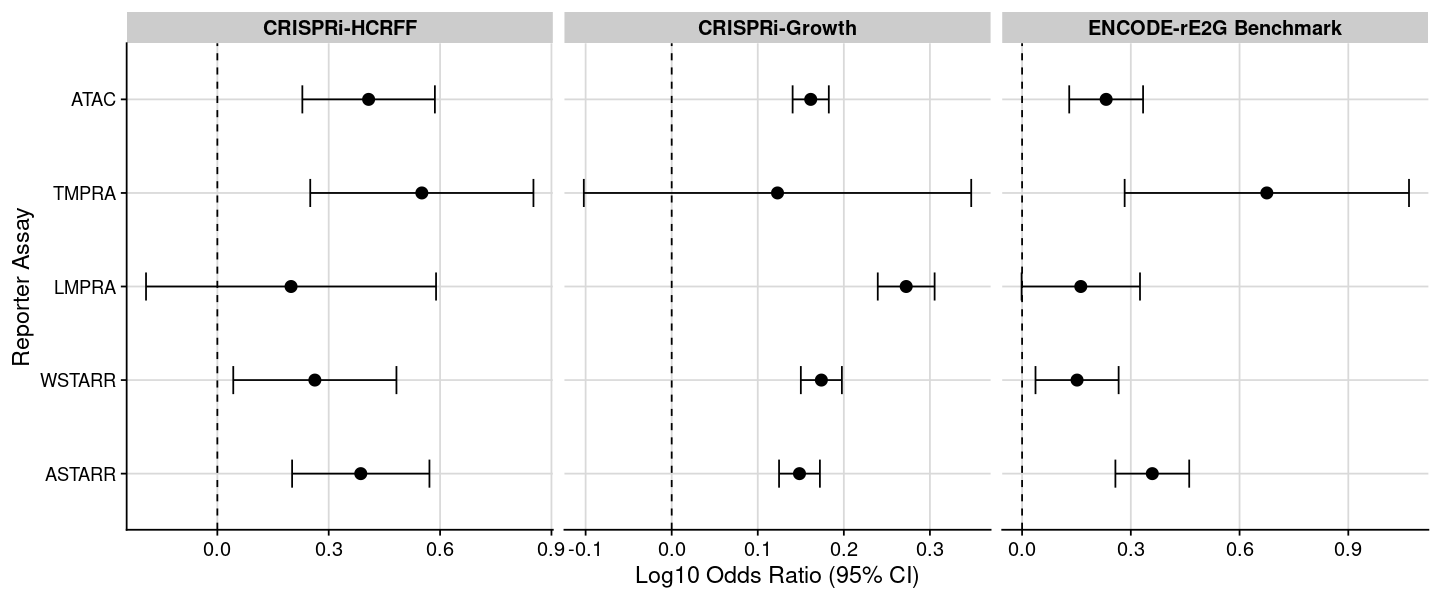

In [73]:
dat = dat_logit_stats
dat = dat %>% dplyr::mutate(
    Assay_STARRMPRA = factor(Assay_STARRMPRA, levels=VEC_TXT_ASSAY_INP),
    Assay_CRISPR    = factor(Assay_CRISPR,    levels=VEC_TXT_ASSAY_OUT)
)

gpt = ggplot(dat, aes(x = Log10OR, y = Assay_STARRMPRA)) +
    geom_point(size = 3) +
    geom_errorbarh(aes(xmin = Log10OR_CI_Lower, xmax = Log10OR_CI_Upper), height = 0.3) +
    facet_wrap(~ Assay_CRISPR) +
    geom_vline(xintercept = 0, linetype="dashed") +
    facet_wrap(~ Assay_CRISPR, scale = "free_x") +
    labs(x = "Log10 Odds Ratio (95% CI)", y = "Reporter Assay") +
    theme_cowplot() +
    background_grid() +
    theme(
        strip.text = element_text(face = "bold"),
        axis.text.y = element_text(size = 11)
    )
    
options(repr.plot.height=5, repr.plot.width=12)
print(gpt)